In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

from glob import glob

9 files loades
========Image-0=========
Original  \  Processed


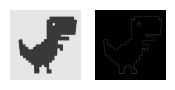

0 33: area = 727.5 aspect ratio = 1.0308747855917668 perimeter = 6119.727044582367


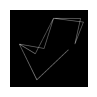

========Image-1=========
Original  \  Processed


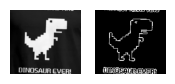

1 2: area = 280.5 aspect ratio = 3.4615384615384617 perimeter = 196.81118202209473


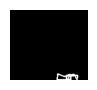

1 3: area = 874.0 aspect ratio = 4.75 perimeter = 196.85281217098236


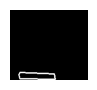

1 4: area = 4199.0 aspect ratio = 1.0309278350515463 perimeter = 496.73506212234497


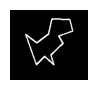

========Image-2=========
Original  \  Processed


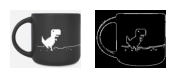

2 47: area = 45.0 aspect ratio = 1.0869565217391304 perimeter = 360.4507911205292


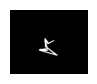

2 52: area = 40.0 aspect ratio = 0.4603174603174603 perimeter = 270.85281205177307


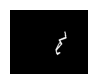

2 66: area = 82.5 aspect ratio = 0.611764705882353 perimeter = 335.0954523086548


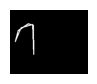

2 72: area = 466.5 aspect ratio = 1.3312101910828025 perimeter = 1219.9625449180603


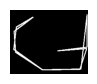

2 76: area = 96.0 aspect ratio = 69.5 perimeter = 281.79898953437805


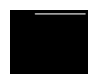

========Image-3=========
Original  \  Processed


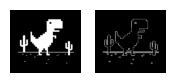

3 10: area = 14270.0 aspect ratio = 1.5276073619631902 perimeter = 1698.7005710601807


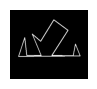

========Image-4=========
Original  \  Processed


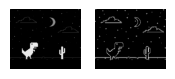

4 24: area = 825.5 aspect ratio = 2.090909090909091 perimeter = 596.0660148859024


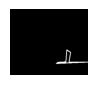

4 28: area = 2096.0 aspect ratio = 1.2857142857142858 perimeter = 408.4507908821106


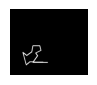

4 49: area = 13.0 aspect ratio = 4.857142857142857 perimeter = 210.2253955602646


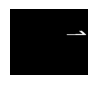

========Image-5=========
Original  \  Processed


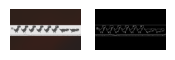

5 0: area = 25.0 aspect ratio = 298.0 perimeter = 1196.6274166107178


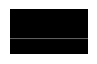

5 17: area = 610.0 aspect ratio = 54.18181818181818 perimeter = 1224.0832602977753


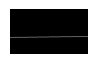

5 37: area = 32.0 aspect ratio = 2.1052631578947367 perimeter = 568.9360725879669


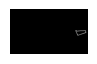

5 40: area = 1421.0 aspect ratio = 2.1052631578947367 perimeter = 308.911687374115


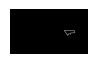

5 42: area = 50.5 aspect ratio = 1.024390243902439 perimeter = 301.9238803386688


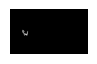

5 48: area = 1422.0 aspect ratio = 0.9365079365079365 perimeter = 316.2253956794739


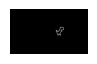

5 49: area = 1431.0 aspect ratio = 0.9206349206349206 perimeter = 312.56854152679443


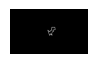

5 50: area = 1361.5 aspect ratio = 0.9206349206349206 perimeter = 325.63960921764374


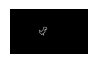

5 51: area = 91.0 aspect ratio = 0.9206349206349206 perimeter = 526.5929262638092


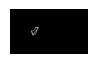

5 52: area = 35.5 aspect ratio = 1.2424242424242424 perimeter = 254.6690467596054


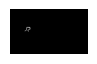

5 53: area = 1401.0 aspect ratio = 0.9206349206349206 perimeter = 324.56854152679443


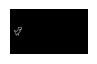

========Image-6=========
Original  \  Processed


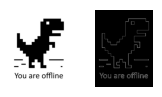

6 9: area = 300.0 aspect ratio = 0.8333333333333334 perimeter = 152.76955199241638


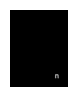

6 13: area = 280.0 aspect ratio = 0.8 perimeter = 152.28427076339722


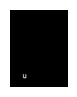

6 26: area = 277.0 aspect ratio = 0.7073170731707317 perimeter = 150.22539567947388


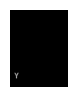

6 28: area = 682.5 aspect ratio = 1.0454545454545454 perimeter = 359.1543278694153


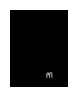

6 35: area = 770.0 aspect ratio = 13.875 perimeter = 234.0


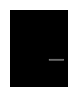

6 40: area = 56516.5 aspect ratio = 0.941952506596306 perimeter = 2133.6396092176437


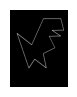

========Image-7=========
Original  \  Processed


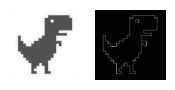

7 3: area = 25587.0 aspect ratio = 0.924901185770751 perimeter = 1335.0538227558136


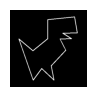

========Image-8=========
Original  \  Processed


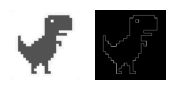

8 0: area = 25586.5 aspect ratio = 0.924901185770751 perimeter = 1333.6396092176437


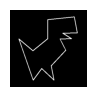

In [2]:
dino_files = glob('./imgs/dinos/*') #png gives an array of 0 and 1?
print(f"{len(dino_files)} files loades")

list_area = []
list_perimeter = []
list_aspect_ratio = []
list_approx = []

for index_img, file in enumerate(dino_files):
    img = cv.imread(file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blurred_image = cv.GaussianBlur(img_gray, (3, 3), 0)
    image_resized = cv.resize(img_gray, None, fx=0.60, fy=0.60)

    kernel_sharpening = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    img_sharpened = cv.filter2D(image_resized, -1, kernel_sharpening)

    eightbit = np.uint8(np.absolute(img_sharpened))#8-bit vallues within range 0 to 255

    _, binary = cv.threshold(eightbit, 30, 255, cv.THRESH_BINARY)

    print(f"========Image-{index_img}=========")
    print("Original  \\  Processed")
    fig, ax = plt.subplots(1, 2, figsize=(2,1))
    ax[0].imshow(img)
    ax[1].imshow(binary, cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()
    
    contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    for index, contour in enumerate(contours):
        x, y, w, h = cv.boundingRect(contour)
        
        area = cv.contourArea(contour)
        aspect_ratio = w / float(h)
        perimeter = cv.arcLength(contour, True)
        approx = cv.approxPolyDP(contour, 0.02 * perimeter, True)
        
        if area > 10 and perimeter > 150:
            
            
            list_area.append(area)
            list_aspect_ratio.append(aspect_ratio)
            list_perimeter.append(perimeter)
            list_approx.append(approx)
            
            print(f"{index_img} {index}: area = {area} aspect ratio = {aspect_ratio} perimeter = {perimeter}")
            
            canvas = np.zeros_like(binary)
            cv.drawContours(canvas, [approx], -1, (255, 255, 255), thickness=2)
            
            fig, ax = plt.subplots(figsize=(1, 1))
            ax.imshow(canvas, cmap='gray')
            ax.axis('off')
            plt.show()
    print(f"========================")
